In [137]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

1.Import the Data

In [138]:
customer_data=pd.read_csv('Data\Customer Data.csv')

<>:1: SyntaxWarning: invalid escape sequence '\C'
<>:1: SyntaxWarning: invalid escape sequence '\C'
C:\Users\HP\AppData\Local\Temp\ipykernel_15340\2438110086.py:1: SyntaxWarning: invalid escape sequence '\C'
  customer_data=pd.read_csv('Data\Customer Data.csv')


In [139]:
customer_data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [140]:
## Attribute Information
customer_data.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

2.Data Preprocessing And EDA(Exploratory Data Analysis)

Attribute Information:
* CUST_ID:-Unique Id of Every Customer
* BALANCE:- Balance of the Customer
* BALANCE_FREQUENCY:- How Frequently the Customer checks the balance
* PURCHASES:- Total Purchases made by the Customer
* ONEOFFPURCHASES:- Total One Time Purchases made by the Customer
* INSTALLMENTS_PURCHASES:- Total Purchases made in Installments
* CASH_ADVANCE:- Advance Cash by Customer Payed
* PURCHASES_FREQUENCY:- How Frequently the Customer Purchases
* ONEOFFPURCHASES_FREQUENCY:- How Frequently the Customer Purchases One Time
* CASH_ADVANCE_FREQUENCY:- How Frequently the Customer takes Cash Advance
* PURCHASES_INSTALLMENTS_FREQUENCY:- How Frequently the Customer Purchases in Installments
* CASH_ADVANCE_TRX:- Total Cash Advance Transactions
* PURCHASES_TRX:- Total Purchases Transactions
* DEBT_PAYMENTS:- Total Debt Payments
* PAYMENTS_CURRENT:- Total Payments made by Customer
* MINIMUM_PAYMENTS:- Total Minimum Payments made by Customer
* PRC_FULL_PAYMENT:- Full Payment By Customers
* TENURE:- Tenure of the Customer


In [141]:
customer_data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


<Axes: >

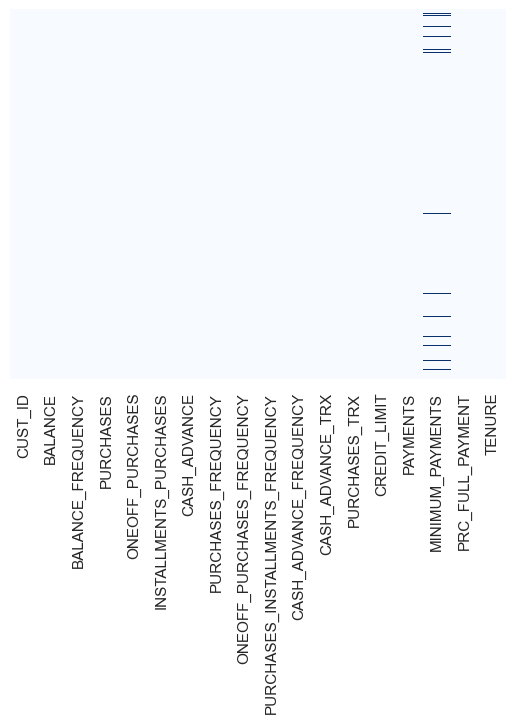

In [142]:
sns.heatmap(customer_data.isnull(),yticklabels=False,cbar=False,cmap="Blues")


In [143]:
##by this heatmap we saw that the MINIMUM_PAYMENTS  have good amount of null values other than that no one have null values.

In [144]:
customer_data.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [145]:
##here the MINIMUM_PAYMENTS and CREDIT_LIMIT have null values onto their columns so we will treat up them

In [146]:
columns_contains_nullValues=[columns for columns in customer_data.columns if customer_data[columns].isnull().sum()>0]

In [147]:
columns_contains_nullValues

['CREDIT_LIMIT', 'MINIMUM_PAYMENTS']

In [148]:
'''So for treating null values we have diffrent methods
1.Fill Null Values With median

2.Fill Null Values With Mean

3.Fill Null Values With Zero

4.Remove the columns
Note:-but here we didnt remove the columns or fill with zero that genrally happens when the columns contains null values of the total values 50% atleast.
'''

'So for treating null values we have diffrent methods\n1.Fill Null Values With median\n\n2.Fill Null Values With Mean\n\n3.Fill Null Values With Zero\n\n4.Remove the columns\nNote:-but here we didnt remove the columns or fill with zero that genrally happens when the columns contains null values of the total values 50% atleast.\n'

In [149]:
'''
So for what we use mean or median we compare them
'''

'\nSo for what we use mean or median we compare them\n'

In [150]:
def distplots(df, columns, fill_type):
    plt.figure(figsize=(15, 5))
    sns.set(style="whitegrid")

    copy_data = df.copy()

    for i, col in enumerate(columns):
        plt.subplot(1, len(columns), i + 1)

        # Original data plot
        sns.kdeplot(data=df, x=col, label='Original', color='red',linewidth=5, fill=True)

        # Filling missing values
        if fill_type == "mean":
            copy_data[col] = copy_data[col].fillna(copy_data[col].mean())
        elif fill_type == "median":
            copy_data[col] = copy_data[col].fillna(copy_data[col].median())

        # Filled data plot
        sns.kdeplot(data=copy_data, x=col, label=fill_type.capitalize(), color='green',linewidth=3, fill=True)

        plt.title(f'Distribution of {col}')
        plt.legend()

    plt.tight_layout()
    plt.show()

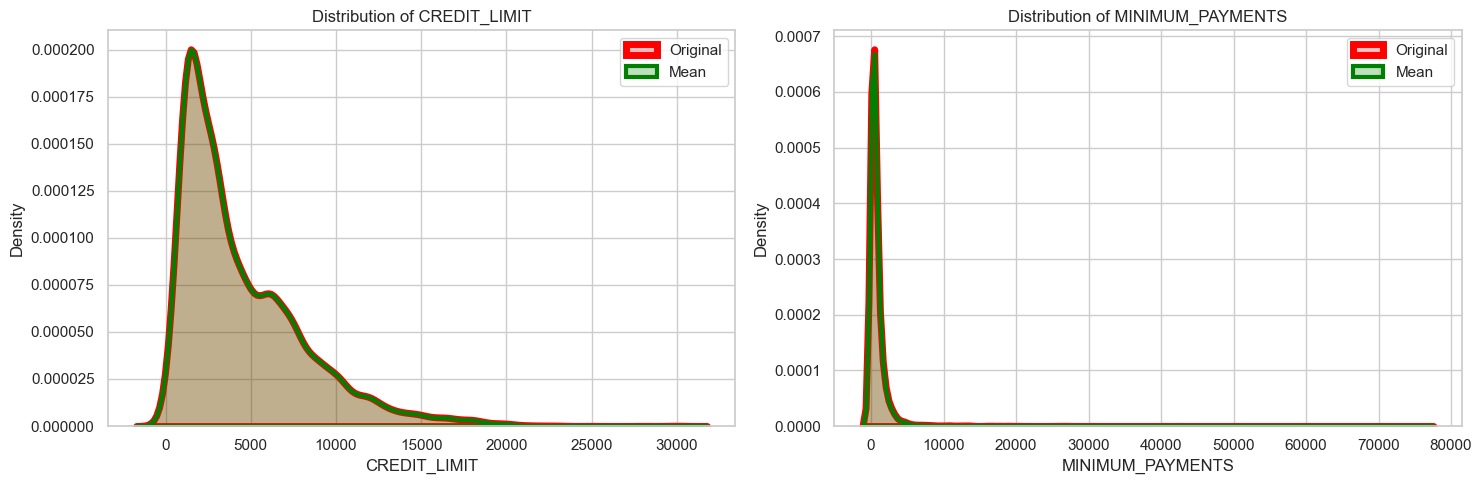

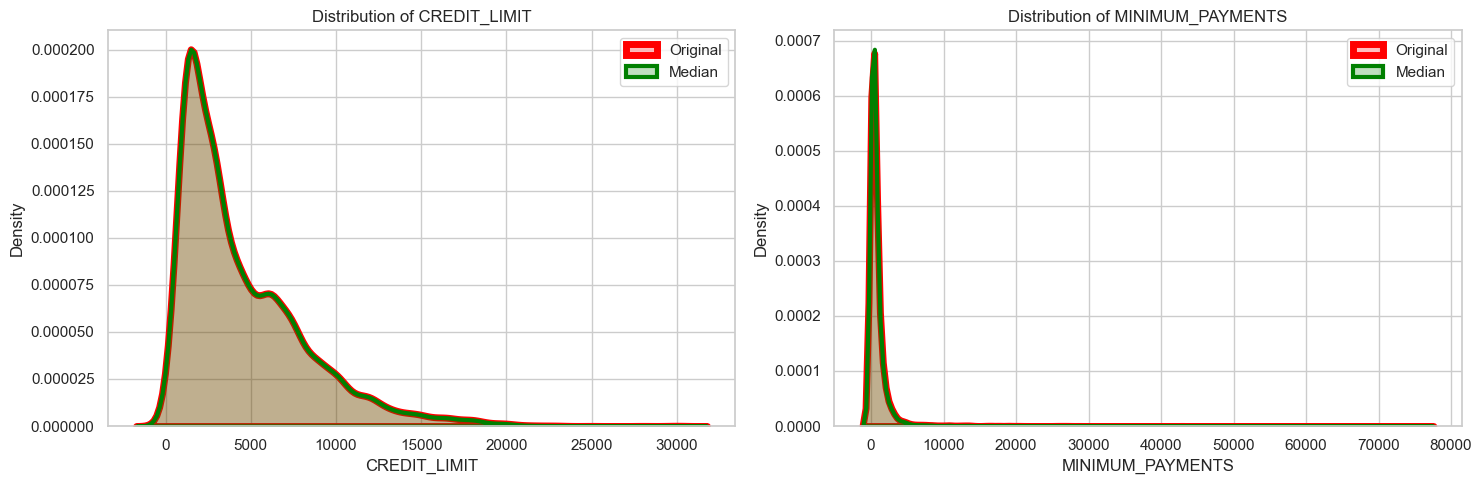

In [151]:
distplots(customer_data,columns_contains_nullValues,fill_type="mean")
distplots(customer_data,columns_contains_nullValues,fill_type="median")


In [152]:
from scipy.stats import skew
copy_data=customer_data.copy()
# Assuming 'columns_contains_nullValues' is a list of column names with missing values
for column in columns_contains_nullValues:
    # Drop NaN values before calculating skewness
    valid_data = copy_data[column].dropna()
    
    # Calculate skewness only if there's more than one unique value
    if valid_data.nunique() > 1:
        skewness = skew(valid_data)
    else:
        skewness = "Not Applicable (constant or insufficient data)"
    
    print(f"Skewness of {column}: {skewness}")


Skewness of CREDIT_LIMIT: 1.522208803328015
Skewness of MINIMUM_PAYMENTS: 13.620430990120362


In [153]:
##here skewness is much so there are chances of outliers .
###here we use mean because the median affects more to the normal distributions compare to mean so we can use mean

In [154]:
for column in columns_contains_nullValues:
    customer_data[column]=customer_data[column].fillna(customer_data[column].mean())

In [155]:
customer_data.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [156]:
##here we didnt need of customer_ID so we will remove it

In [157]:
customer_data.drop(columns='CUST_ID',inplace=True,axis=0)

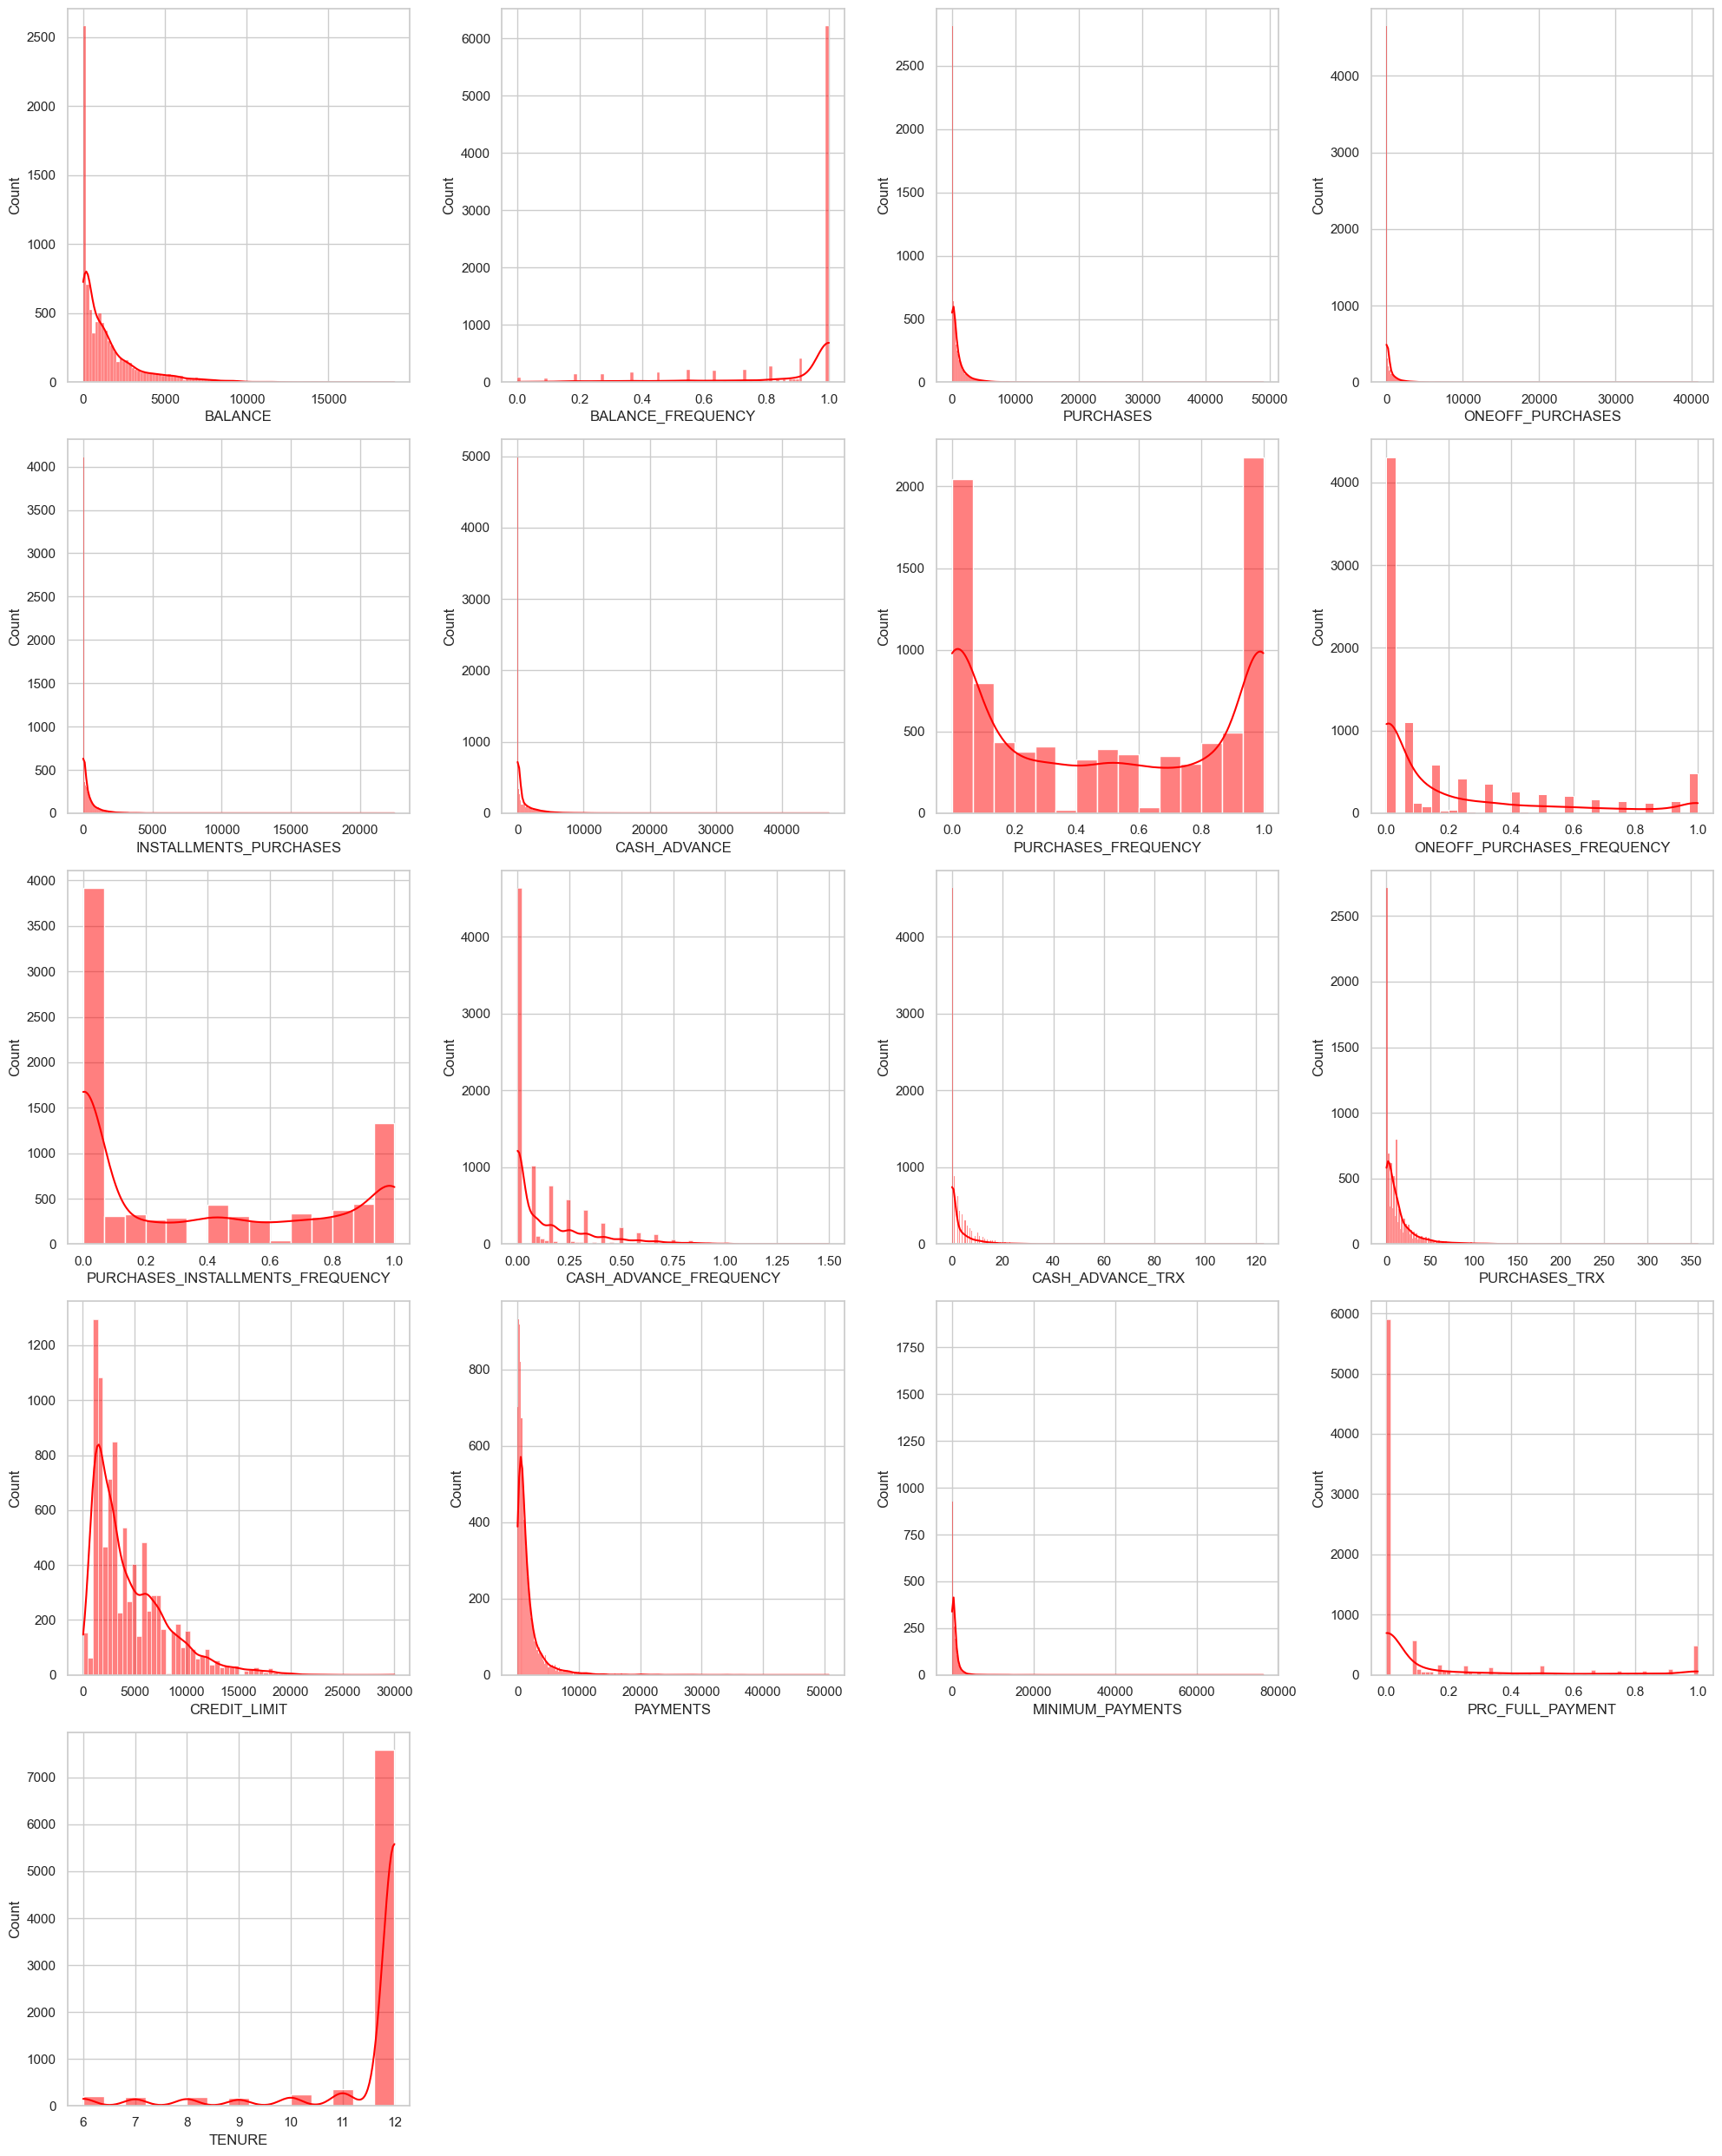

In [158]:
num_columns = len(customer_data.columns)
num_rows = (num_columns // 4) + 1 
plt.figure(figsize=(20, 5 * num_rows))  # Adjusted height dynamically
for i, col in enumerate(customer_data.columns):
    plt.subplot(num_rows, 4, i + 1)  
    sns.histplot(customer_data[col], kde=True, color='red') 
    plt.xlabel(col)
    plt.tight_layout()

plt.show()

3.Oultier detection

### we have different techniques to detect outliers like 
* boxplot(IQR)
* Z-Score
* k-means 
* dbscan
* Isolation Forest
* Local Outlier Factor
* Elliptic Envelope
* One-Class SVM
* PCA
##### here we use boxplot,z-Score,LOR,Isolotation Forest to find the outliers on the data

##### boxplot method

In [159]:
##for boxplot method
##Visualization

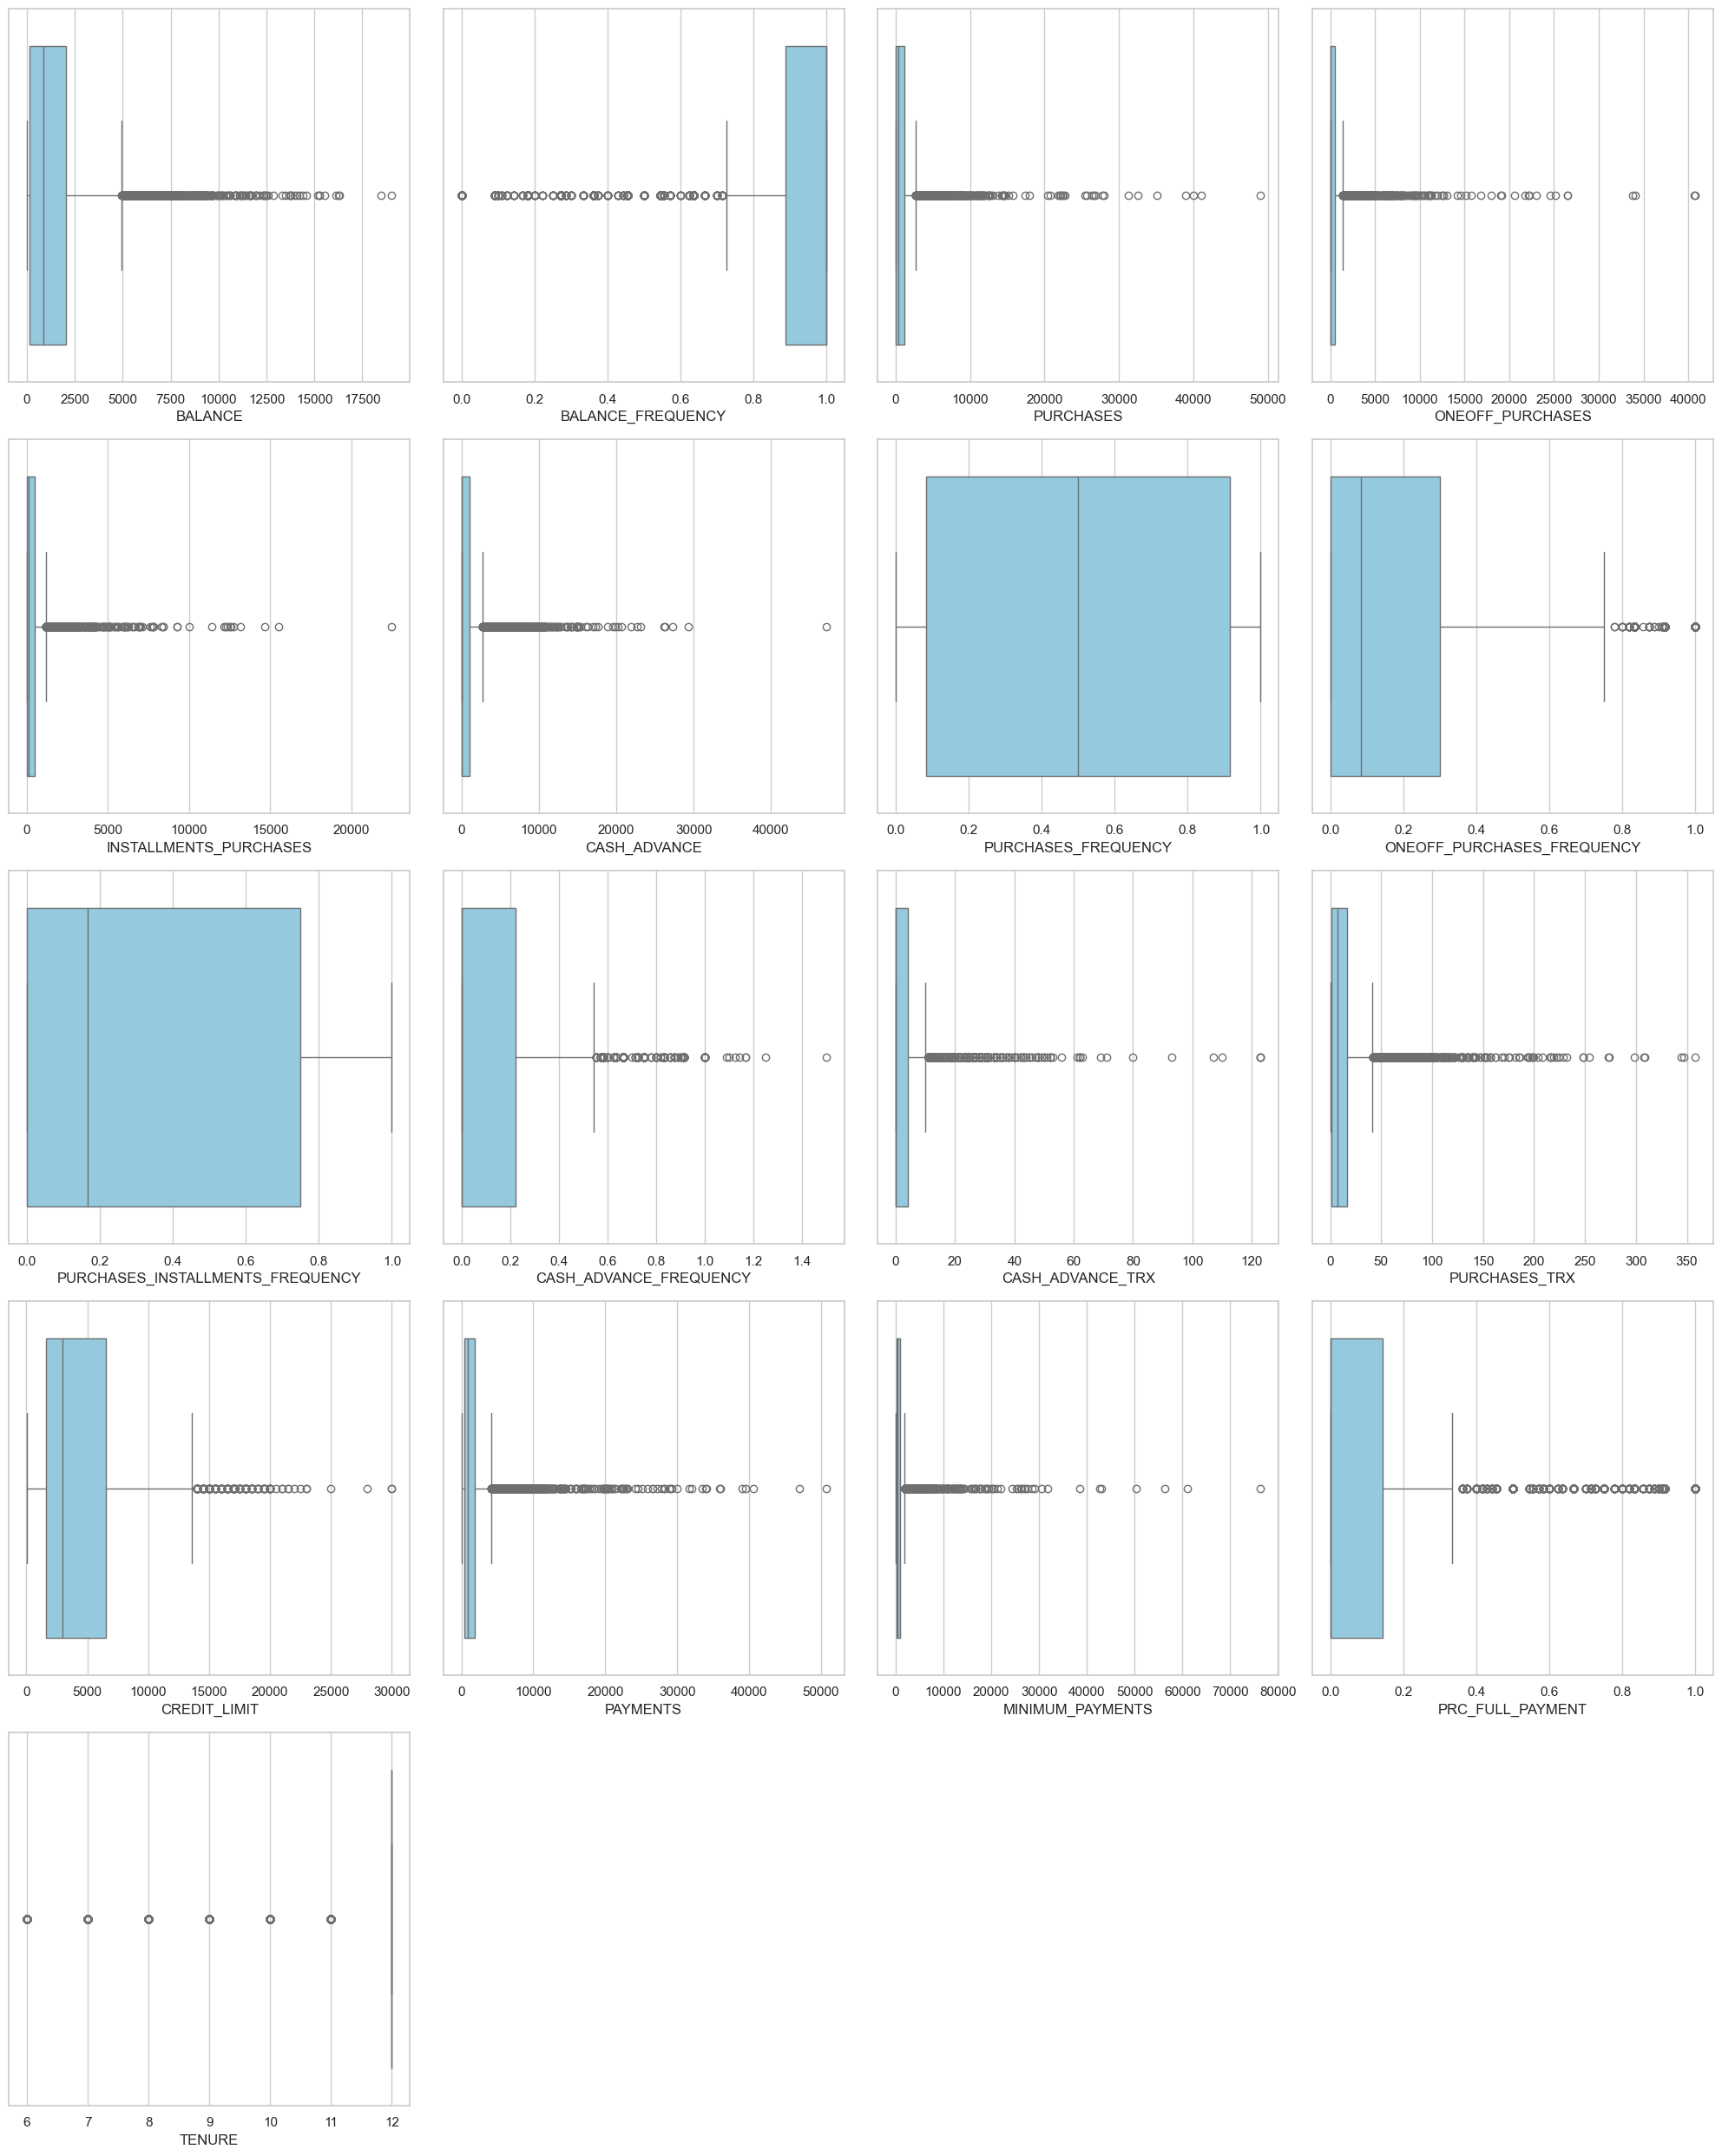

In [160]:
num_columns = len(customer_data.columns)
num_rows = (num_columns // 4) + 1 
plt.figure(figsize=(20, 5 * num_rows))  # Adjusted height dynamically
for i, col in enumerate(customer_data.columns):
    plt.subplot(num_rows, 4, i + 1)  
    sns.boxplot(data=customer_data, x=col,color='skyblue')
    plt.xlabel(col)
    plt.tight_layout()

In [180]:
def IQR(data):
    results = []
    for columns in data.columns:
        percentile75=data[columns].quantile(0.75)
        percentile25=data[columns].quantile(0.25)
        IQRRange=percentile75-percentile25 ##i
        outliers = data[(data[columns] > (percentile75+1.5*IQRRange)) | (data[columns] < (percentile25-1.5*IQRRange))]
        percentage=round(((len(outliers)/len(data))*100),2)
        if percentage>0:
            results.append((percentage,columns))
    return results

In [181]:
IQR(customer_data)


[(7.77, 'BALANCE'),
 (16.68, 'BALANCE_FREQUENCY'),
 (9.03, 'PURCHASES'),
 (11.32, 'ONEOFF_PURCHASES'),
 (9.69, 'INSTALLMENTS_PURCHASES'),
 (11.51, 'CASH_ADVANCE'),
 (8.74, 'ONEOFF_PURCHASES_FREQUENCY'),
 (5.87, 'CASH_ADVANCE_FREQUENCY'),
 (8.98, 'CASH_ADVANCE_TRX'),
 (8.56, 'PURCHASES_TRX'),
 (2.77, 'CREDIT_LIMIT'),
 (9.03, 'PAYMENTS'),
 (8.65, 'MINIMUM_PAYMENTS'),
 (16.47, 'PRC_FULL_PAYMENT'),
 (15.26, 'TENURE')]

##### 2. Z-Score method

In [163]:
def Z_ScoreOutlierDetection(data,threeshold=3):
    z_score_outliers=[]
    for column in data.columns:
        Z_score=((data[column]-np.mean(data[column]))/np.std(data[column]))
        outliers = data[np.abs(Z_score) > threeshold]
        percentage=((len(outliers)*100)/len(data))
        z_score_outliers.append((column,percentage))
    return z_score_outliers

In [164]:
Z_ScoreOutlierDetection(customer_data)

[('BALANCE', 2.189944134078212),
 ('BALANCE_FREQUENCY', 1.9664804469273742),
 ('PURCHASES', 1.5083798882681565),
 ('ONEOFF_PURCHASES', 1.3631284916201116),
 ('INSTALLMENTS_PURCHASES', 1.5307262569832403),
 ('CASH_ADVANCE', 2.0335195530726256),
 ('PURCHASES_FREQUENCY', 0.0),
 ('ONEOFF_PURCHASES_FREQUENCY', 0.0),
 ('PURCHASES_INSTALLMENTS_FREQUENCY', 0.0),
 ('CASH_ADVANCE_FREQUENCY', 2.223463687150838),
 ('CASH_ADVANCE_TRX', 1.9217877094972067),
 ('PURCHASES_TRX', 2.0670391061452515),
 ('CREDIT_LIMIT', 1.6983240223463687),
 ('PAYMENTS', 1.776536312849162),
 ('MINIMUM_PAYMENTS', 1.1396648044692737),
 ('PRC_FULL_PAYMENT', 0.0),
 ('TENURE', 4.402234636871508)]

##### 4.Outlier Removal
###### I Use Cap method for Outlier Removal
###### this cap method genrally convert the outliers to its upperlimit or lowerlimit respectively.

In [182]:
### I use the Cap method of Outlier Transformation here

def Oultier_Removal_Using_IQR(data):
    for columns in data.columns:
        percentile75=data[columns].quantile(0.75)
        percentile25=data[columns].quantile(0.25)
        IQRRange=percentile75-percentile25 ##i
        upper_limit=percentile75+1.5*IQRRange
        lower_limit=percentile25-1.5*IQRRange
        outliers = data[(data[columns] > (percentile75+1.5*IQRRange)) | (data[columns] < (percentile25-1.5*IQRRange))]
        data[columns] = np.where(data[columns] > upper_limit, upper_limit,
                          np.where(data[columns] < lower_limit, lower_limit, data[columns]))

In [183]:
Oultier_Removal_Using_IQR(customer_data)

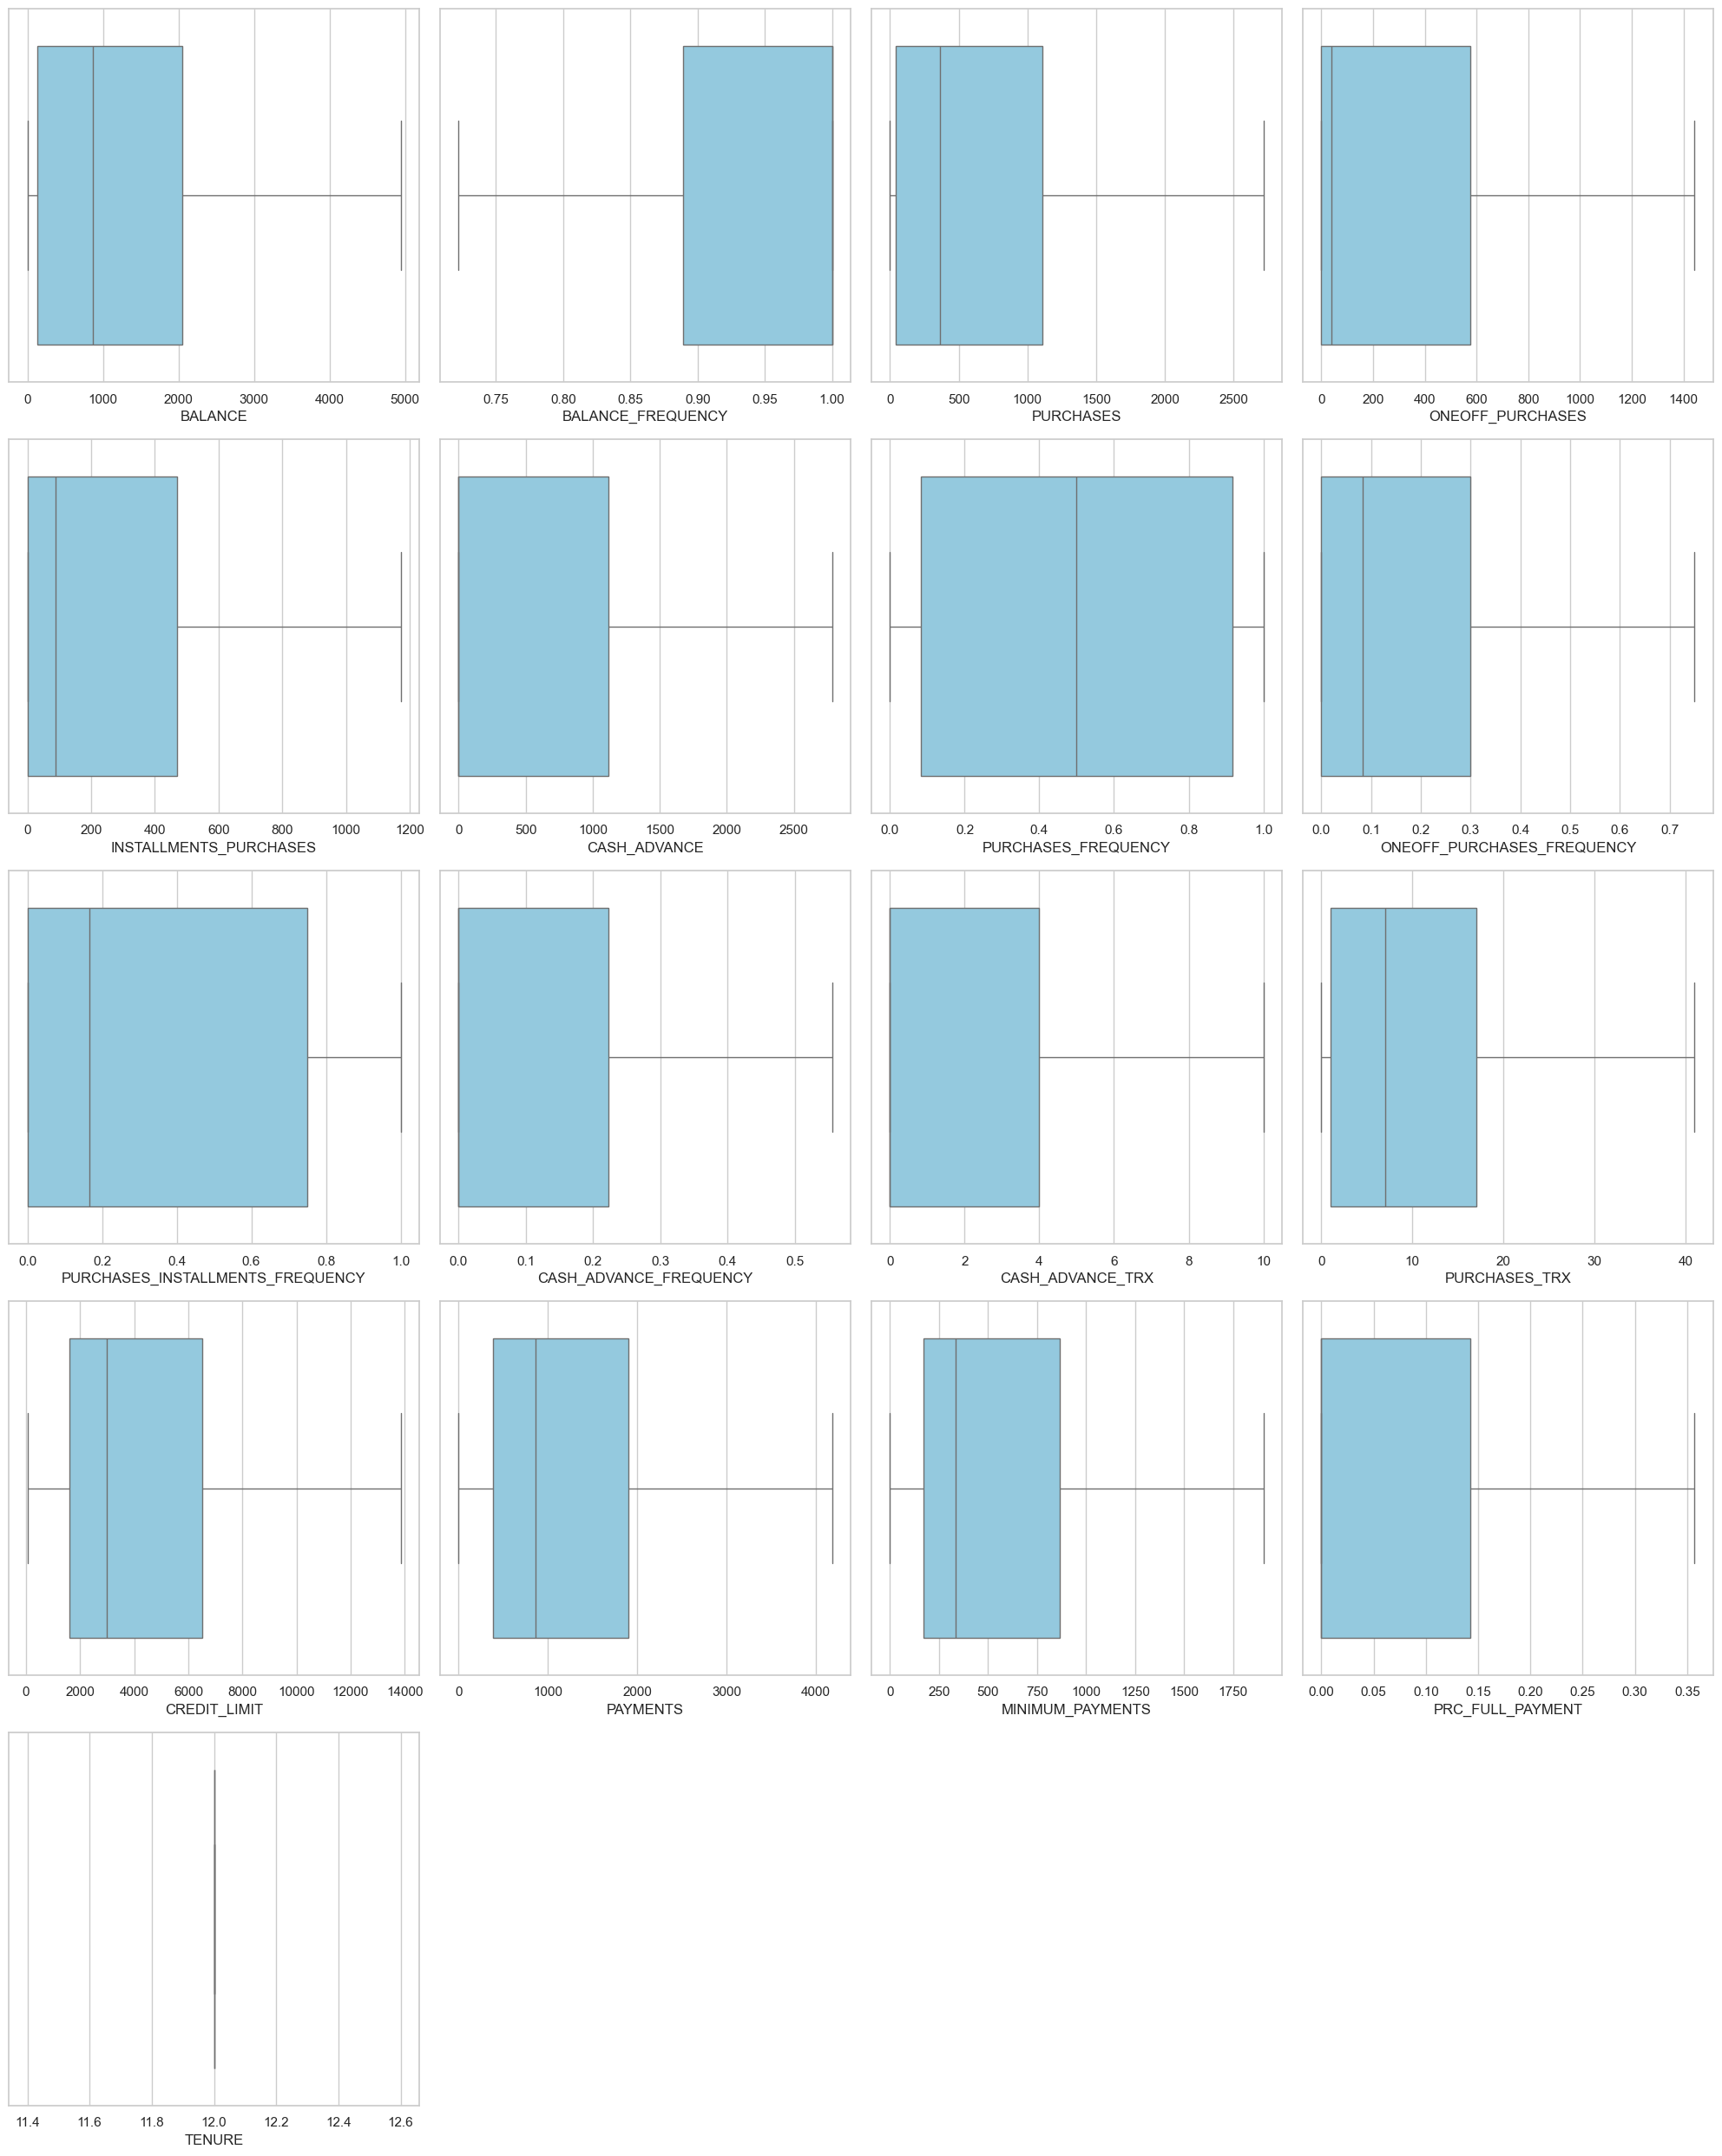

In [184]:
num_columns = len(customer_data.columns)
num_rows = (num_columns // 4) + 1 
plt.figure(figsize=(20, 5 * num_rows))  # Adjusted height dynamically
for i, col in enumerate(customer_data.columns):
    plt.subplot(num_rows, 4, i + 1)  
    sns.boxplot(data=customer_data, x=col,color='skyblue')
    plt.xlabel(col)
    plt.tight_layout()

In [185]:
IQR(customer_data)

[]

In [186]:
'''Observation :- So here all the Outliers We detect before are going according to their lower limit or upper limit'''

'Observation :- So here all the Outliers We detect before are going according to their lower limit or upper limit'

##### 5. Standard Scaling

In [192]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [191]:
scaler = StandardScaler()
scaler.fit_transform(customer_data)

array([[-0.87782104, -1.02187519, -0.72968709, ..., -0.79404745,
        -0.62927738,  0.        ],
       [ 1.1785459 , -0.2027079 , -0.83815959, ...,  0.83675109,
         0.9739614 ,  0.        ],
       [ 0.71848713,  0.61645939,  0.04095652, ...,  0.05869355,
        -0.62927738,  0.        ],
       ...,
       [-0.88920486, -0.88535181, -0.67397271, ..., -0.89385616,
         1.17436805,  0.        ],
       [-0.89567082, -0.88535181, -0.83815959, ..., -0.94046866,
         1.17436805,  0.        ],
       [-0.66200474, -1.88655177,  0.40489651, ..., -0.88359305,
        -0.62927738,  0.        ]])

#### 6.Dimeonal Reduction Using PCA

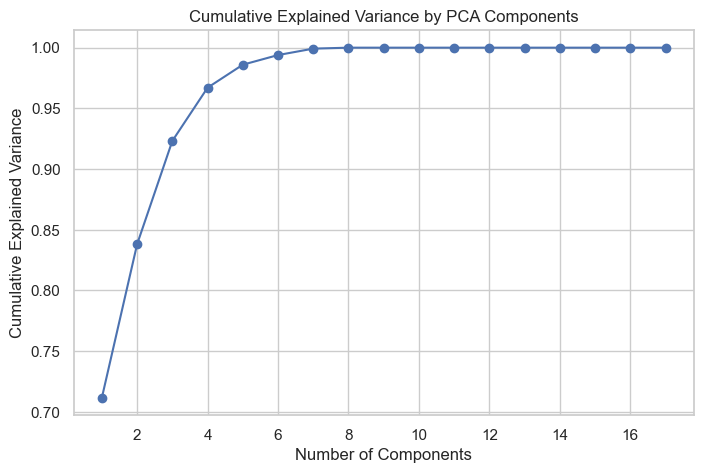

Number of components to retain 95% variance: 4


In [193]:

pca = PCA()
pca.fit(customer_data)

# Step 3: Plot the explained variance ratio
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by PCA Components')
plt.grid(True)
plt.show()

# Step 4: Decide how many components to retain
# For example, if you want to retain 95% of the variance:
n_components = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Number of components to retain 95% variance: {n_components}")


In [196]:
# convert the DataFrame into 2D DataFrame for visualization
pca = PCA(n_components=4)
principal_comp = pca.fit_transform(customer_data)
pca_df = pd.DataFrame(data=principal_comp,columns=["pca1","pca2","pca3","pca4"])
pca_df.head()

,pca1,pca2,pca3,pca4
0,-3930.063189,-562.933095,-513.074888,45.763504
1,3528.270511,2345.415740,810.037742,2001.750513
2,2987.670017,-501.365056,-1127.236466,-1073.452133
3,2794.805627,-1223.989631,-1004.007050,-1326.210006
4,-3458.365724,106.592847,-319.893804,-83.375323


#### 7.Hyperparameter Tunning